<a href="https://colab.research.google.com/github/omniaghazy/Unsupervised-learning/blob/main/Wholesale_customers(hierarchy_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/Wholesale customers data.csv' ,usecols=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'])




In [2]:
data = data.drop(columns=["Channel" ,"Region"])

In [45]:
features = np.log(data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features )

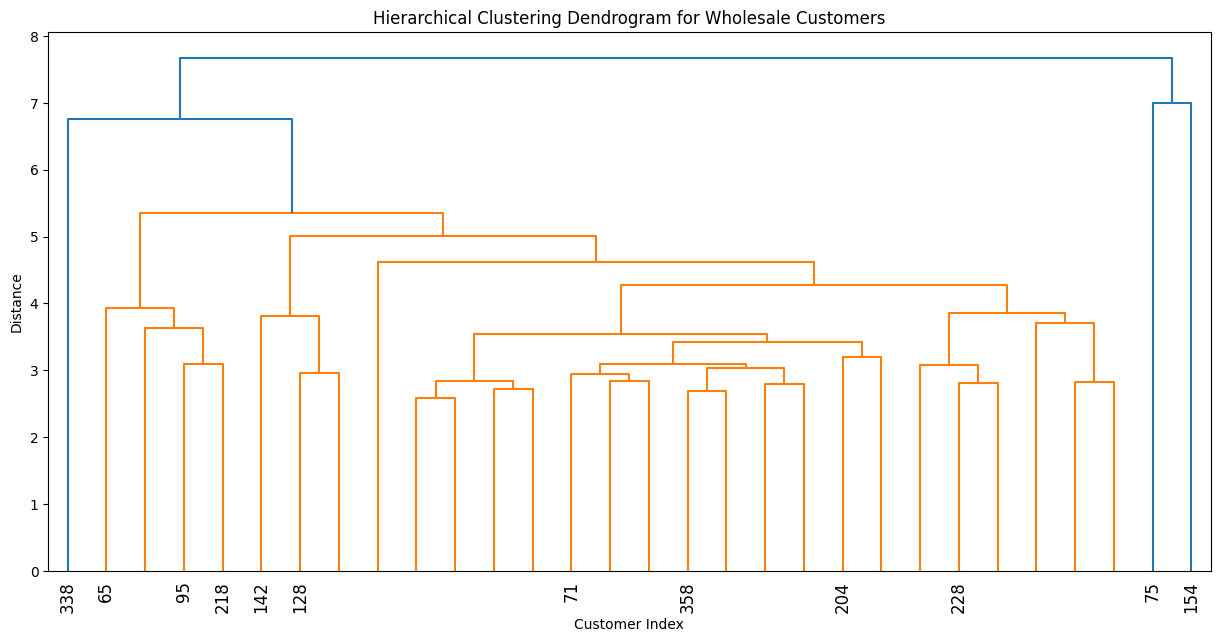

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt



plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram for Wholesale Customers')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
dendrogram(
     linkage(features_scaled, method='average'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show the last 30 merged clusters
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering

# The number of clusters to form. We chose 3 based on the dendrogram
# عدد المجموعات اللي هنكونها. اخترنا 3 بناءً على الـ dendrogram
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')

# Fit the model and get the cluster labels
# نطبق الموديل ونجيب رقم المجموعة لكل نقطة بيانات
y_agglomerative = model.fit_predict(features_scaled)

# Let's see the cluster labels
print(y_agglomerative)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
# Create a DataFrame from the original data
clusters_data = data.copy()

# Add the cluster labels from Hierarchical Clustering to the DataFrame
# نضيف أرقام المجموعات الجديدة إلى البيانات الأصلية
clusters_data['Cluster'] = y_agglomerative

# Calculate the mean for each cluster to get the centroids
# الآن نحسب المتوسط لكل مجموعة
agglomerative_centroids = clusters_data.groupby('Cluster').mean()

# Let's see the results!
# لنرى النتائج!
print(agglomerative_centroids)

               Fresh         Milk     Grocery       Frozen  Detergents_Paper  \
Cluster                                                                        
0        12007.10274  5820.011416  7987.26484  3075.726027       2894.627854   
1          622.00000    55.000000   137.00000    75.000000          7.000000   
2        20398.00000  1137.000000     3.00000  4407.000000          3.000000   

          Delicassen  
Cluster               
0        1529.589041  
1           8.000000  
2         975.000000  


In [49]:
# First, let's create a dictionary to map the cluster ID to its descriptive name
cluster_descriptions = {
    0: "Regular / Average Customers",
    1: "Small Grocery Stores",
    2: "Large Retailers / Bulk Buyers",
}

# Now, we add a new column to our centroids table with the descriptions
agglomerative_centroids['Description'] = agglomerative_centroids.index.map(cluster_descriptions)

# And finally, we sort the clusters and display the final result
final_agglomerative_clusters = agglomerative_centroids.sort_values(by='Fresh', ascending=False)
print("Final Agglomerative Clusters Analysis:")
print(final_agglomerative_clusters)

Final Agglomerative Clusters Analysis:
               Fresh         Milk     Grocery       Frozen  Detergents_Paper  \
Cluster                                                                        
2        20398.00000  1137.000000     3.00000  4407.000000          3.000000   
0        12007.10274  5820.011416  7987.26484  3075.726027       2894.627854   
1          622.00000    55.000000   137.00000    75.000000          7.000000   

          Delicassen                    Description  
Cluster                                              
2         975.000000  Large Retailers / Bulk Buyers  
0        1529.589041    Regular / Average Customers  
1           8.000000           Small Grocery Stores  


In [50]:
from sklearn.metrics import silhouette_score

score = silhouette_score(features_scaled, y_agglomerative)
print("Silhouette Score:", score)

Silhouette Score: 0.5514413066663204
